In [5]:
!pip install pandas matplotlib seaborn scikit-learn imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

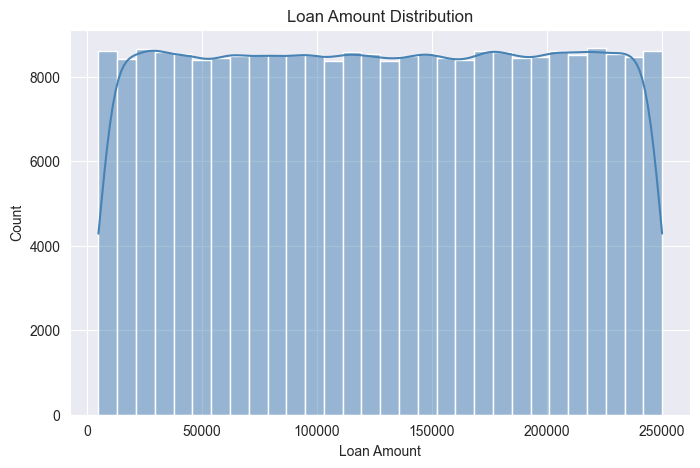

Class Distribution Before Resampling:
 Default
0    225694
1     29653
Name: count, dtype: int64
Class Distribution After Resampling:
 Default
0    180555
1    180555
Name: count, dtype: int64
Confusion Matrix:
 [[26143 18996]
 [ 2407  3524]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.71     45139
           1       0.16      0.59      0.25      5931

    accuracy                           0.58     51070
   macro avg       0.54      0.59      0.48     51070
weighted avg       0.83      0.58      0.66     51070


Accuracy Score: 0.58090855688271


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE  # Importing SMOTE for oversampling

# Load dataset
filePath = "C:/Users/Adiseshan Ramanan/Documents/AdiDevs/DS&ML/LoanPrediction/Loan_default.csv"
loanData = pd.read_csv(filePath)

# Display basic information
print(loanData.head())
print(loanData.info())

# Drop missing values
loanData = loanData.dropna()

# Selecting relevant columns
loanData = loanData[['Default', 'LoanAmount', 'Income', 'DTIRatio', 'CreditScore']]
loanData['Default'] = loanData['Default'].astype('category')

# Plot Loan Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(loanData['LoanAmount'], bins=30, kde=True, color='steelblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

# Splitting data into train and test sets
X = loanData[['CreditScore', 'LoanAmount', 'Income', 'DTIRatio']]
y = loanData['Default']

# Check class distribution
print("Class Distribution Before Resampling:\n", y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Oversampling the minority class using SMOTE
smote = SMOTE(random_state=123)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class Distribution After Resampling:\n", y_train.value_counts())

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating model performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))  # Avoid warning
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Save cleaned data
cleaned_file_path = "C:/Users/Adiseshan Ramanan/Documents/AdiDevs/DS&ML/LoanPrediction/cleanedData.csv"
loanData.to_csv(cleaned_file_path, index=False)